In [19]:
import pandas as pd
import glob

# Define the base path and the list of activities with their respective directory patterns
base_path = '/Users/oe/BPS_Project/Graphene_BP/predictions_svr/'
activity_directories = {
    'ShuffleCV_hgcp': 'SVM_Shuffle_hgcp',
    'NoShuffleCV_hgcp': 'SVM_0_NoShuffle_hgcp',
    'SingleTrain_hgcp': 'SVM_PostEx',  # Replace with actual directory name
    'SingleTrain_S1All_TestNextDay': 'SVM_4NextDay',  # Replace with actual directory name
    'NoShuffleCV_valsalva': 'SVM_Valsalva'  # Replace with actual directory name
}

# Initialize a list to store DataFrames for each file
dataframes = []

# Iterate over activities for subject 1
for activity, directory in activity_directories.items():
    file_pattern = f'{base_path}/{directory}/subject_id_1/*{activity}*mean_test.csv'
    file_paths = glob.glob(file_pattern)

    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path, usecols=[
                'Ref_data_DBP', 'Ref_data_SBP',
                'Predict_data_DBP', 'Predict_data_SBP'
            ])
            df['Estimation Error DBP'] = df['Predict_data_DBP'] - df['Ref_data_DBP']
            df['Estimation Error SBP'] = df['Predict_data_SBP'] - df['Ref_data_SBP']
            df['Activity'] = activity
            dataframes.append(df)
        except FileNotFoundError:
            print(f'File not found: {file_path}')
        except pd.errors.EmptyDataError:
            print(f'No data in file: {file_path}')
        except Exception as e:
            print(f'An error occurred: {e}')

# Concatenate all DataFrames
subject_1_errors = pd.concat(dataframes)

# Count the number of rows by activity
subject_1_errors.groupby('Activity').count()


,Ref_data_DBP,Ref_data_SBP,Predict_data_DBP,Predict_data_SBP,Estimation Error DBP,Estimation Error SBP
Activity,,,,,,
NoShuffleCV_hgcp,1948,1948,1948,1948,1948,1948
NoShuffleCV_valsalva,397,397,397,397,397,397
ShuffleCV_hgcp,198,198,198,198,198,198
SingleTrain_S1All_TestNextDay,481,481,481,481,481,481
SingleTrain_hgcp,94,94,94,94,94,94


0    Ref_data_DBP
1    Ref_data_DBP
2    Ref_data_DBP
3    Ref_data_DBP
4    Ref_data_DBP
Name: Measurement, dtype: object


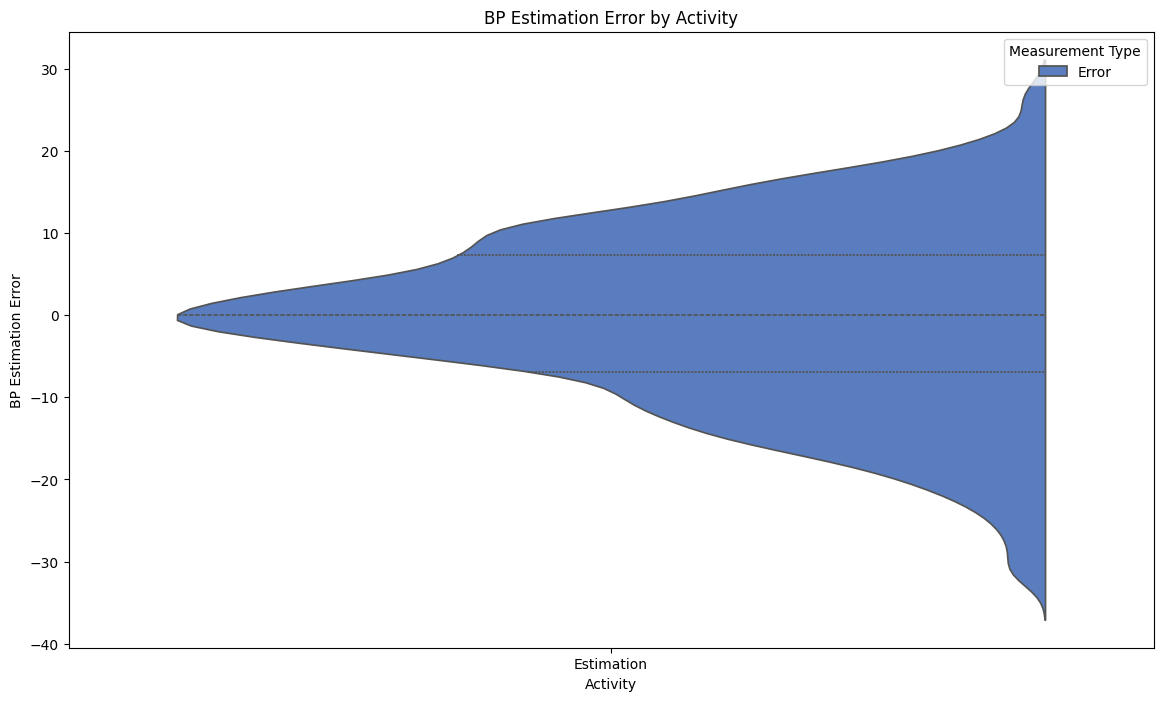

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame to have 'Activity', 'Type' (DBP/SBP), and 'Error' columns
melted_df = subject_1_errors.melt(var_name='Measurement', value_name='Error')

# Check the format of the 'Measurement' column
print(melted_df['Measurement'].head())

# Safely split the 'Measurement' into 'Activity' and 'Type'
melted_df['Activity'] = melted_df['Measurement'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else None)
melted_df['Type'] = melted_df['Measurement'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

# Filter out rows with None values (if any)
melted_df = melted_df.dropna(subset=['Activity', 'Type'])

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Activity', y='Error', hue='Type', data=melted_df, split=True, inner='quart', palette='muted')

# Customize the plot
plt.title('BP Estimation Error by Activity')
plt.ylabel('BP Estimation Error')
plt.xlabel('Activity')
plt.legend(title='Measurement Type')

# Show the plot
plt.show()



In [35]:
# ... [previous code]

# Check for duplicate rows
duplicates = subject_1_errors.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check the unique values for each activity
for activity in subject_1_errors['Activity'].unique():
    print(f"{activity} unique DBP errors:", subject_1_errors[subject_1_errors['Activity'] == activity]['Estimation Error DBP'].unique())
    print(f"{activity} unique SBP errors:", subject_1_errors[subject_1_errors['Activity'] == activity]['Estimation Error SBP'].unique())

# Check the counts for each combination of activity and error type
print(melted_df.groupby(['Activity', 'Type']).size())

# If duplicates are found or the counts are not as expected, you may need to correct the data processing steps.
# ...

# Plotting code
# ...




Number of duplicate rows: 0
ShuffleCV_hgcp unique DBP errors: [-1.17896361e+01  6.19469270e-01  6.87079132e+00  8.06980527e+00
  6.72924771e+00 -1.19656629e+01 -8.00595758e+00 -1.31817962e+01
 -1.23030408e+00  2.56923226e+00 -4.68619306e+00  3.12481675e+00
  1.14525372e+01  9.10028489e+00  1.09846176e+01  1.31980286e+01
  1.64397913e+01 -4.21632092e+00 -1.51072464e+00  9.19474330e+00
 -6.67602310e-01  2.23610790e-01 -1.85133448e+01 -1.51998372e+00
 -3.65733183e+00 -8.23264353e+00 -5.71743412e+00  2.55399084e+00
 -1.54253182e+00 -2.25967591e+00  1.29355302e+01  1.44114159e+01
  1.87015134e+01  1.67195926e+01  1.01294262e+01 -2.16075100e-01
  1.17278837e+01  1.59738016e+01 -2.29659894e+00 -2.08152704e+00
 -2.25471253e+00 -1.08769585e+01 -5.59775566e+00 -1.40093508e+00
 -5.61464831e+00  2.12837672e+00  4.24777424e+00 -5.00415571e+00
 -4.25284195e+00  1.32416009e+01  1.24744463e+01  1.40446453e+01
  1.47209469e+01 -1.04812415e+01  7.17538560e-01 -2.15920223e+00
  8.52738327e+00  6.71570178

       Ref_data_DBP  Ref_data_SBP  Predict_data_DBP  Predict_data_SBP  \
count   3118.000000   3118.000000       3118.000000       3118.000000   
mean      82.008209    126.802670         82.766047        125.545167   
std        9.231607     11.162295          3.261094          1.481432   
min       63.230107     98.791458         73.033995        120.819698   
25%       73.855701    118.632706         83.297995        124.929956   
50%       82.022823    125.963913         83.901360        125.625387   
75%       88.596034    134.914416         84.426102        126.287734   
max      108.782360    158.722715        100.630190        141.990903   

       Estimation Error DBP  Estimation Error SBP  
count           3118.000000           3118.000000  
mean               0.757837             -1.257504  
std                9.491224             11.394302  
min              -31.595947            -33.412042  
25%               -4.897859             -9.538007  
50%                0.448701   

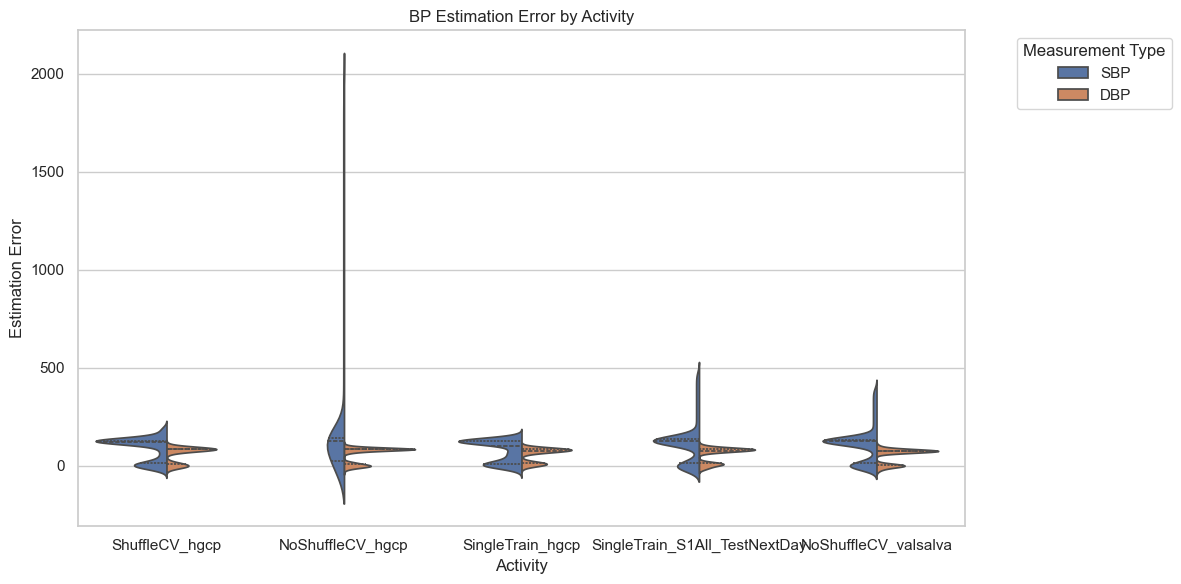

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'subject_1_errors' DataFrame is correctly calculated and structured

# Check the summary statistics and filter out extreme values if necessary
print(subject_1_errors.describe())
# You might want to filter your data if you find any outliers or impossible values

# Melt the DataFrame to prepare for plotting
melted_df = subject_1_errors.reset_index().melt(id_vars=['Activity'], var_name='Measurement', value_name='Error')

# Extract 'Type' from 'Measurement'
melted_df['Type'] = melted_df['Measurement'].str.contains('DBP').replace({True: 'DBP', False: 'SBP'})

# Plotting
sns.set(style="whitegrid")  # Set the style for the plots

plt.figure(figsize=(12, 6))  # Set the figure size for the plot
ax = sns.violinplot(data=melted_df, x='Activity', y='Error', hue='Type', split=True, inner='quart')

plt.title('BP Estimation Error by Activity')  # Set the title
plt.xlabel('Activity')  # Set the x-axis label
plt.ylabel('Estimation Error')  # Set the y-axis label

# Place the legend outside the plot
plt.legend(title='Measurement Type', bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot


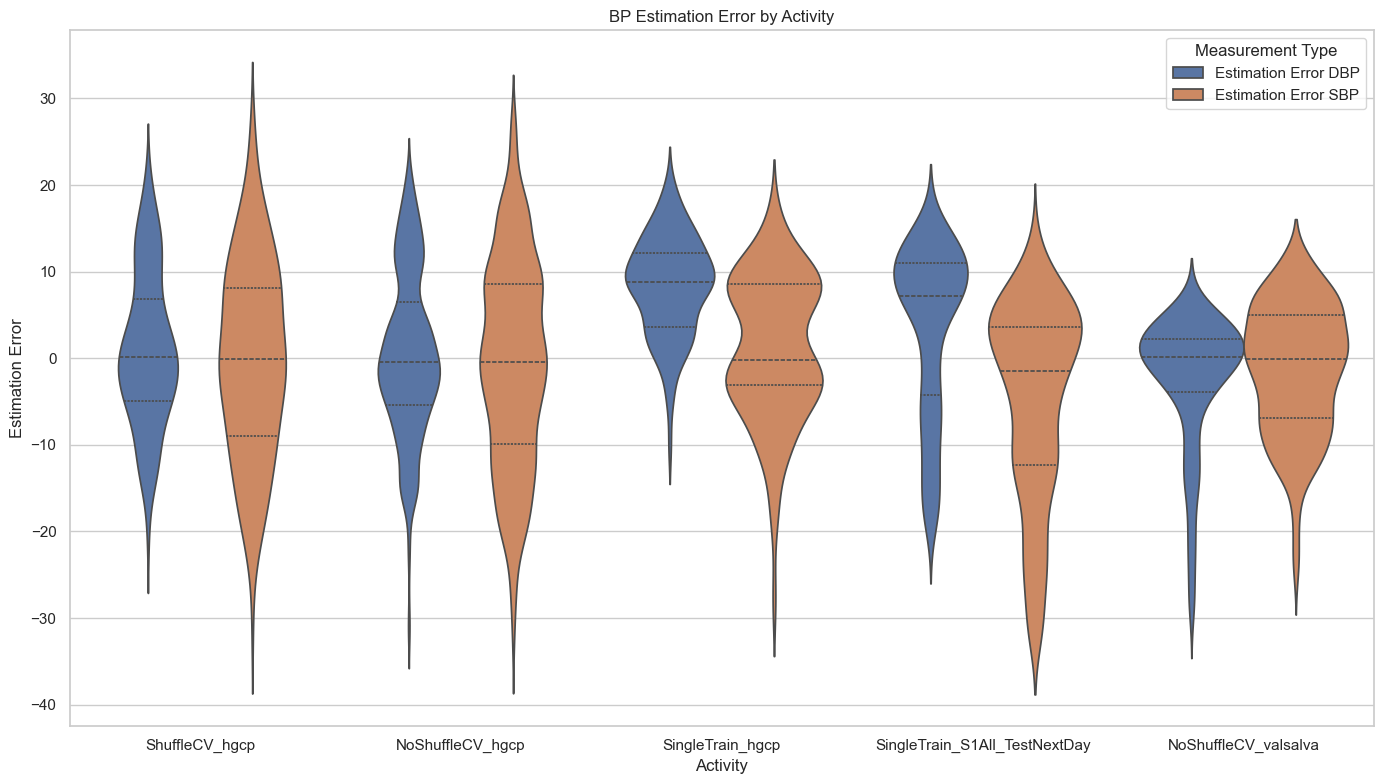

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'subject_1_errors' is your DataFrame with the 'Activity',
# 'Estimation Error DBP', and 'Estimation Error SBP' columns already included.

# Melt the DataFrame to have 'Activity', 'Measurement Type', and 'Error'
melted_df = subject_1_errors.melt(id_vars='Activity',
                                   value_vars=['Estimation Error DBP', 'Estimation Error SBP'],
                                   var_name='Measurement Type', value_name='Error')

# Set the style of the visualization
sns.set(style="whitegrid")

# Draw the violin plots
plt.figure(figsize=(14, 8))
sns.violinplot(data=melted_df, x='Activity', y='Error', hue='Measurement Type', split=False, inner='quart')

# Customize the plot
plt.title('BP Estimation Error by Activity')
plt.xlabel('Activity')
plt.ylabel('Estimation Error')

# Adjust legend location
plt.legend(title='Measurement Type', loc='upper right')

# Adjust the layout
plt.tight_layout()
plt.show()



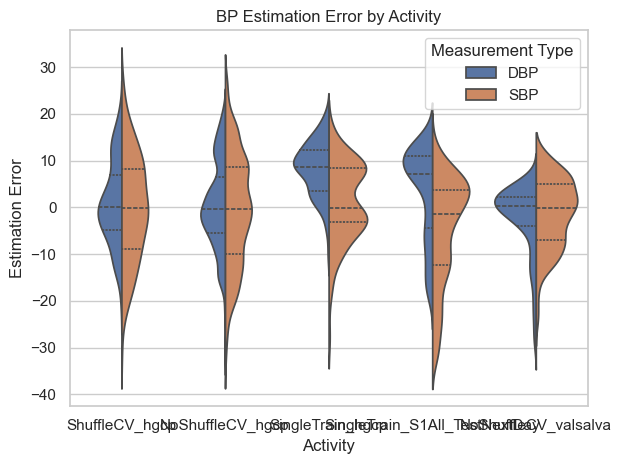

In [36]:
# Assuming 'subject_1_errors' is the DataFrame before melting
# Only keep the error columns and 'Activity'
error_columns = ['Estimation Error DBP', 'Estimation Error SBP']
subject_1_errors = subject_1_errors[error_columns + ['Activity']]

# Now let's melt the DataFrame
melted_df = subject_1_errors.melt(id_vars=['Activity'], var_name='Type', value_name='Error')

# Replace 'Estimation Error DBP' with 'DBP' and 'Estimation Error SBP' with 'SBP' in 'Type'
melted_df['Type'] = melted_df['Type'].str.replace('Estimation Error ', '')

# Now, let's plot again
sns.violinplot(data=melted_df, x='Activity', y='Error', hue='Type', split=True, inner='quart')
plt.title('BP Estimation Error by Activity')
plt.xlabel('Activity')
plt.ylabel('Estimation Error')
plt.legend(title='Measurement Type')
plt.tight_layout()
plt.show()
